<a href="https://colab.research.google.com/github/toledorodrigow/RedesNeuraisLagrangianas/blob/main/TentandoRNL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ESTUDOS DO AEROPÊNDULO
    UNIVERSIDADE FEDERAL DE CAMPINA GRANDE
    DEPARTAMENTO DE ENGENHARIA ELÉTRICA – DEE
    DISCIPLINA: TCC
    ORIENTADORES: ANTONIO MARCUS NOGUEIRA LIMA E
    SAULO OLIVEIRA DORNELLAS LUIZ
    CURSO: BACHARELADO EM ENGENHARIA ELÉTRICA
    
* ALUNO: RODRIGO TOLEDO DE ARAUJO
* MATRÍCULA: 118110296

In [1]:
!pip install SciencePlots

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np #Biblioteca númerica do python
import sympy as smp #Biblioteca de matemática simbolica do Python
from scipy.integrate import odeint #Metódo de resolução de equações diferenciais de primeira ordem
import matplotlib.pyplot as plt #Biblioteca de geração gráfica
import scienceplots
#Definindo o estilo do gráfico
plt.style.use(['science','no-latex','grid','ieee','bright'])
plt.rcParams['xtick.labelsize'] = 5
plt.rcParams['ytick.labelsize'] = 5

## Definindo as variáveis

### Para o motor

In [3]:
# Definindo o tempo
t = smp.symbols('t', real = True)

# Constantes para o motor
R, L, Kw  = smp.symbols('R L K_w', real = True)

#Definindo a carga

Q = smp.symbols('Q',cls=smp.Function)
Q = Q(t)

# Definindo a corrente

i_a = smp.symbols('i_a', cls = smp.Function )
i_a = i_a(t)
i_a = smp.diff(Q,t)

# Definindo a derivada da corrente

i_a_d = smp.symbols('i_a_d', cls = smp.Function )

i_a_d = i_a_d(t)
i_a_d = smp.diff(i_a,t)

#Definindo a velocidade angular

w_1 = smp.symbols('omega_1', cls= smp.Function)
w_1 = w_1(t)

#Definindo a posição angular1

theta1 = smp.symbols('theta_1', cls = smp.Function)
theta1 = theta1(t)

#Definindo a posição angular2

theta2 = smp.symbols('theta_2', cls = smp.Function)
theta2 = theta2(t)

#Definindo a velocidade angular1

w_1 = smp.diff(theta1,t)
# Definindo as tensões

v_a, e_a = smp.symbols('v_a e_a', cls = smp.Function )
v_a = v_a(t)
e_a = e_a(t)
e_a = Kw*w_1
e_a

K_w*Derivative(theta_1(t), t)

### Para o conjunto eixo e hélice

In [4]:

# Constantes para o eixo e hélice
F1, F2, Jm, Jh, Ki, Kq, N1, N2 = smp.symbols('F_1 F_2 J_m J_h K_i K_q N_1 N_2', real = True)

#Definindo a velocidade angular2

w_2 = smp.symbols('omega_1', cls= smp.Function)
w_2 = (N1/N2) * w_1


#Definindo a derivada velocidade angular

w1_d = smp.symbols('\dot omega_1', cls= smp.Function)
w1_d = smp.diff(w_1,t)


# Definindo os torques

T_e, T1, T2 = smp.symbols('T_e T_1 T_2', cls = smp.Function )
T_e = Ki*i_a
T1 = T1(t)
T2 = (N2/N1) * T1


### Para o pêndulo

In [5]:
# Constantes para o pêndulo
m, g, l, c, d , Kt= smp.symbols('m g l c d Kt', real = True)

# Como theta é uma função do tempo, a definimos como uma função

theta_p = smp.symbols('theta_p', cls = smp.Function) # r\theta = raw string || cls = classe -> função
theta_p = theta_p(t)

# Definindo d/dt(teta)

theta_p_d = smp.symbols(r'\dot theta_p', cls = smp.Function)
theta_p_d = smp.diff(theta_p,t) #derivada de theta em relação a t.

#Definindo d^2/dt^2 (theta)

theta_p_dd = smp.symbols(r'\ddot theta', cls = smp.Function)
theta_p_dd = smp.diff(theta_p_d,t)

''' Devemos escrever x e y em termos de teta,pois ela é a 
coordenada generalizada, ou seja, x e y são funções de teta
'''
#Definindo x e y

x = smp.symbols('x', cls = smp.Function)
x = d*smp.sin(theta_p) # x como função de theta

y = smp.symbols('y', cls = smp.Function)
y = d*smp.cos(theta_p) # y como função de theta

#Definindo dx/xt e dydt

x_d = smp.symbols('\partial x', cls = smp.Function)
x_d = smp.diff(x,t)

y_d = smp.symbols('\partial y', cls = smp.Function)
y_d = smp.diff(y,t)

# Definindo a força de empuxo

f = smp.symbols('f', cls = smp.Function)
f = Kt*w_2**2
f

Kt*N_1**2*Derivative(theta_1(t), t)**2/N_2**2

## Definindo $T$, $U$, $\mathcal{F}$ e $\mathcal{L}$

Podemos definir 

$$T = \frac{J_m}{2} \dot \theta_1 ^2 + \frac{J_h}{2} \dot \theta_2 ^2 + \frac{m(\dot x^2+\dot y^2)}{2} + \frac{L}{2} \dot Q^2,$$

$$U = -mgy-v_{a}(t)Q+K_{w}\omega_{m}(t)Q$$

$$\mathcal{L}=T-U$$

$$\mathcal{F} = \frac{F}{2} \dot \theta_1 ^2 + \frac{F_2}{2} \dot \theta_2 ^2+ \frac{K_t \dot \theta_2 ^3}{3} + \frac{c}{2} \dot \theta_p ^2 + \frac{R}{2} \dot Q ^2$$

In [6]:
# Definindo T e V

T = Jm/2 * w_1**2 +  Jh/2 * w_2**2 + 1/2 * m * (x_d**2 + y_d**2) + L/2 * i_a**2#Energia potêncial do sistema

U = -m * g * y

# Definindo a Lagrangiana

Lagran = T-U
Lagran

# Definindo a função dissipativa de Rayleigh

F_rayleigh = R/2 * i_a**2 + F1/2 * w_1**2 + F2/2 * w_2**2+ Kq/3 * w_2**3 + c/2 * theta_p_d**2

## Cálculando a Equação de Euler-Lagrange

A equação de de Lagrange para esse caso é:

$$\frac{d}{dt} \frac{\partial \mathcal{L}}{\partial \dot q} - \frac{\partial \mathcal{L}}{\partial q} + \frac{\partial \mathcal{F}}{\partial \dot q}=C_k$$

### Para $Q$

In [7]:
# Definindo as forças externas para o motor

C_k_Q =   v_a - e_a

# Definindo as derivadas

L_d_Q = smp.diff(Lagran,Q)
L_d_Q_d = smp.diff(Lagran,i_a)
F_d_Q_d = smp.diff(F_rayleigh, i_a)

# Equação de Euler-Lagrange
EL_Q = smp.diff(L_d_Q_d,t) - L_d_Q + F_d_Q_d - C_k_Q
EL_Q = EL_Q.simplify()
EL_Q

K_w*Derivative(theta_1(t), t) + L*Derivative(Q(t), (t, 2)) + R*Derivative(Q(t), t) - v_a(t)

#### Resolvendo a equação
Podemos dividir nossa equação de segunda ordem, em duas equações de primeira ordem. Tem-se que

$$\frac{dQ}{dt} = i_a$$

$$\frac{di_a}{dt}=\frac{d^2 Q}{dt^2}$$

In [8]:
# Resolvendo para dteta^2/dt^2

i_diff = smp.solve(EL_Q, i_a_d)[0]
i_diff

(-K_w*Derivative(theta_1(t), t) - R*Derivative(Q(t), t) + v_a(t))/L

### Para $\theta_1$

In [9]:
# Definindo as forças externas para o conjunto eixo e hélice
C_k_theta = T_e

# Definindo as derivadas

L_d_theta1 = smp.diff(Lagran,theta1)
L_d_theta1_d = smp.diff(Lagran,w_1)
F_d_theta1_d = smp.diff(F_rayleigh, w_1)

# Equação de Euler-Lagrange

EL_theta = smp.diff(L_d_theta1_d,t) - L_d_theta1 + F_d_theta1_d - C_k_theta
EL_theta = EL_theta.simplify()
EL_theta


(K_q*N_1**3*Derivative(theta_1(t), t)**2 + N_1**2*N_2*(F_2*Derivative(theta_1(t), t) + J_h*Derivative(theta_1(t), (t, 2))) + N_2**3*(F_1*Derivative(theta_1(t), t) + J_m*Derivative(theta_1(t), (t, 2)) - K_i*Derivative(Q(t), t)))/N_2**3

#### Resolvendo a equação
Podemos dividir nossa equação de segunda ordem, em duas equações de primeira ordem. Tem-se que

$$\frac{d\theta}{dt} = \omega_a$$

$$\frac{d\omega_a}{dt}=\frac{d^2 \theta}{dt^2}$$

In [10]:
# Resolvendo para dteta^2/dt^2

w1_diff = smp.solve(EL_theta, w1_d)[0]
w1_diff.simplify()

(-F_1*N_2**3*Derivative(theta_1(t), t) - F_2*N_1**2*N_2*Derivative(theta_1(t), t) + K_i*N_2**3*Derivative(Q(t), t) - K_q*N_1**3*Derivative(theta_1(t), t)**2)/(N_2*(J_h*N_1**2 + J_m*N_2**2))

### Para $\theta_p$

In [11]:
# Definindo as forças externas
C_k_theta_p = l*f
# Definindo as derivadas

L_d_theta1 = smp.diff(Lagran,theta_p)
L_d_theta1_d = smp.diff(Lagran,theta_p_d)
F_d_theta1_d = smp.diff(F_rayleigh, theta_p_d)

# Equação de Euler-Lagrange
EL_theta_p = smp.diff(L_d_theta1_d,t) - L_d_theta1 + F_d_theta1_d - C_k_theta_p
EL_theta_p = EL_theta_p.simplify()
EL_theta_p

-Kt*N_1**2*l*Derivative(theta_1(t), t)**2/N_2**2 + c*Derivative(theta_p(t), t) + d**2*m*Derivative(theta_p(t), (t, 2)) + d*g*m*sin(theta_p(t))

#### Resolvendo a equação
Podemos dividir nossa equação de segunda ordem, em duas equações de primeira ordem. Tem-se que

$$\frac{d\theta_p}{dt} = \omega_p$$

$$\frac{d\omega_p}{dt}=\frac{d^2 \theta_p}{dt^2}$$

In [12]:
# Resolvendo para dteta^2/dt^2

wp_diff = smp.solve(EL_theta_p, theta_p_dd)[0]
wp_diff

Kt*N_1**2*l*Derivative(theta_1(t), t)**2/(N_2**2*d**2*m) - c*Derivative(theta_p(t), t)/(d**2*m) - g*sin(theta_p(t))/d

## Passando as expressões simbolicas para númericas em *Python*

In [13]:
# criamos arrays do numpy com a função lambdify
# Motor
dQdt_n = smp.lambdify(i_a, i_a)
i_diff_n = smp.lambdify((R,L,Kw,w_1,i_a,v_a),i_diff)


# Conjunto eixo e hélice
dtheta1dt_n = smp.lambdify(w_1,w_1)
w1_diff_n = smp.lambdify((F1,F2,N2,w_1,Ki,i_a,Kq,Kw,N1,Jh,Jm), w1_diff) 


# Pêndulo
dthetapdt_n = smp.lambdify(theta_p_d, theta_p_d)
wp_diff_n = smp.lambdify((g,c,theta_p,l,d,m,theta_p_d,N1,N2,w_1,Kt),wp_diff)



#### Resolvendo as Equações diferenciais numericamente

Chamamos $S = (\theta_1, \omega_1, \theta_p, \omega_p, Q, i_a)$, assim, devemos escrever uma função que retorne $\frac{dS}{dt} = (\omega_1, \frac{d\omega_1}{dt},\omega_p, \frac{d\omega_p}{dt},i_a, \frac{di_a}{dt})$

$dS/dt$ = $f(S,t)$

In [14]:
# Definindo dS/dt
def dSdt(S,t):
    Qq, iaa, thetaa1, omegaa1, thetaap, omegaap = S
    return [
            dQdt_n(iaa),
            i_diff_n(R_n,L_n,Kw_n,omegaa1,iaa,v_a_n),
            dtheta1dt_n(omegaa1),# dthetadt = w_1
            w1_diff_n(F1_n,F2_n,N2_n,omegaa1,Ki_n,iaa,Kq_n,Kw_n,N1_n,Jh_n,Jm_n),
            dthetapdt_n(omegaap),
            wp_diff_n(g_n,c_n,thetaap,l_n,d_n,m_n,omegaap,N1_n,N2_n,omegaa1,Kt_n)
    ]

In [15]:
# Resolvendo o sistema
#Declarando as constantes para o eixo hélice
t_n = np.linspace(0,20,1000)  
F1_n = 3
F2_n = 1
N2_n = 2
N1_n = 1
Ki_n = 0.1
Kq_n = 0.5
Kt_n = 100
Jh_n = 1
Jm_n = 4
# Declarando as constantes para o pendulo
l_n = 0.5
d_n = 0.25
g_n = 9.81
m_n = 0.5
c_n = 1
# Declarando constantes para o motor
R_n = 1
L_n = 10e-3
Kw_n = 0.1
v_a_n = 1
ans = odeint(dSdt, y0 = (0,0,0,0,0,0), t = t_n,rtol=1e-10, atol=1e-10)

#Calculando w2
w_2_f = N1_n/N2_n  * ans.T[3]

## Plotando os resultados

### Carga elétrica e corrente

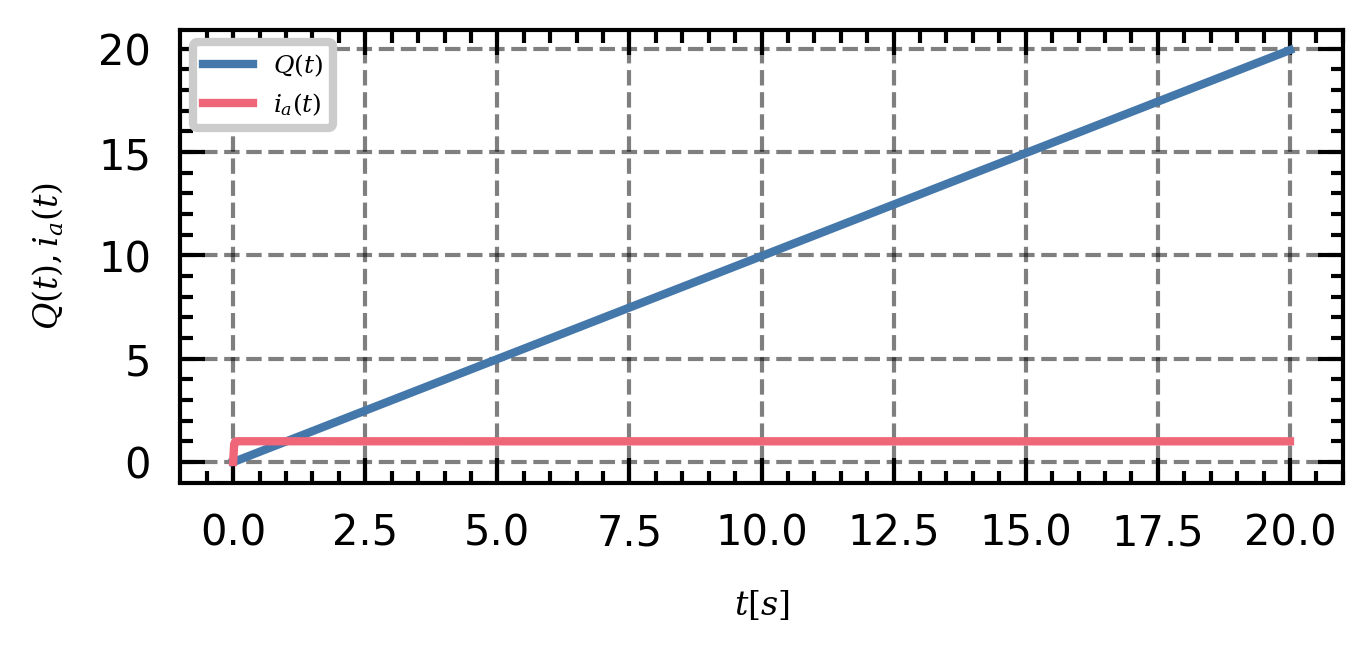

In [16]:
# Definindo a figura 1
fig1, ax1 = plt.subplots(1,1, figsize = (2.5,1))
#plotando a carga
line1_Q = ax1.plot(t_n,ans.T[0],label = r'$Q(t)$')
ax1.set_xlabel(r'$t[s]$',fontsize = 4)
ax1.set_ylabel(r'$Q(t), i_a(t)$',fontsize = 4)
#plotando a corrente
line2_i = ax1.plot(t_n,ans.T[1],label = r'$i_a(t)$')

plt.legend(fontsize = 3)

### $\theta_1$, $\omega_1$ e $\omega_2$

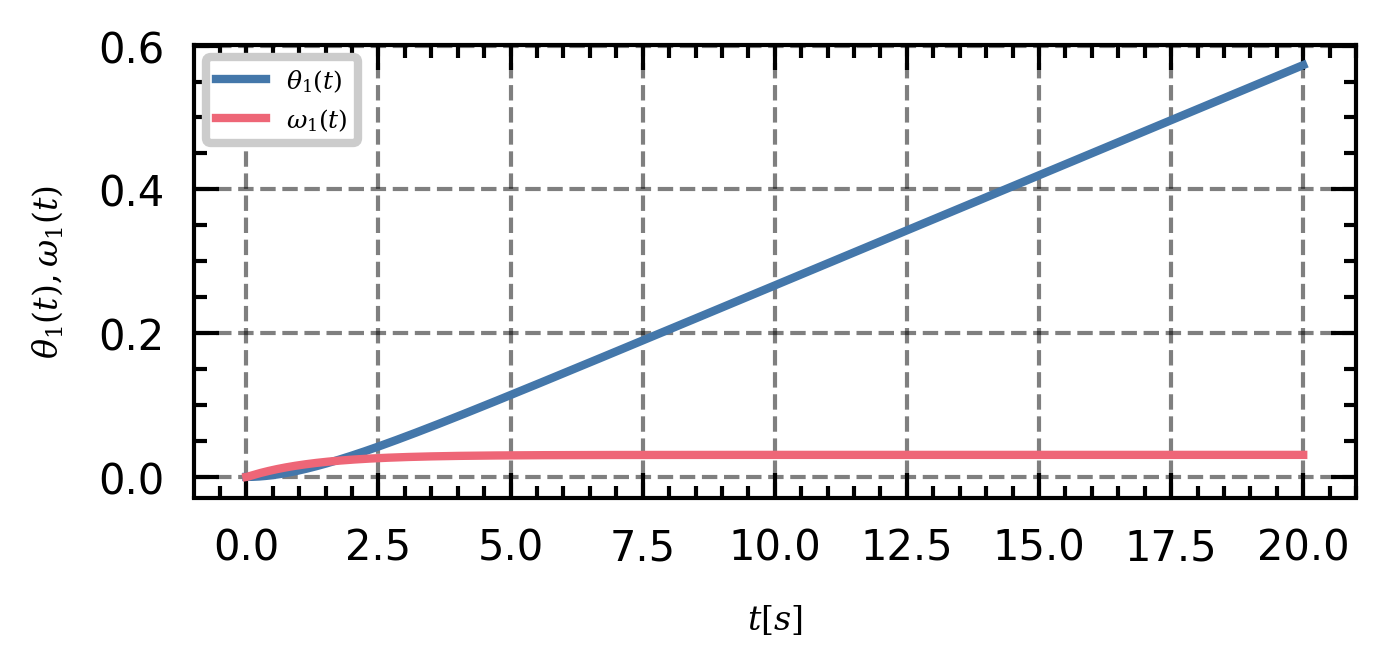

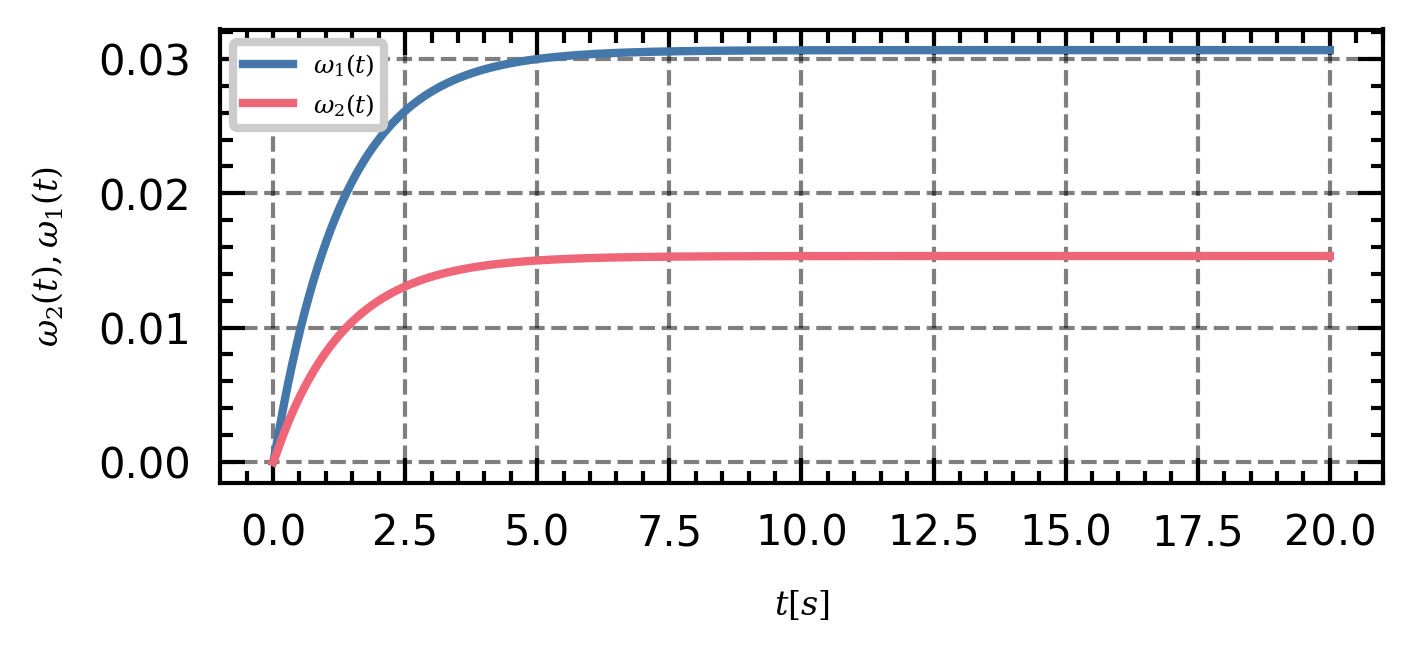

In [17]:
# Definindo a figura 2
fig2, ax2 = plt.subplots(1,1, figsize = (2.5,1))
#plotando theta
line1_the1 = ax2.plot(t_n,ans.T[2],label = r'$\theta_1(t)$')
ax2.set_xlabel(r'$t[s]$',fontsize = 4)
ax2.set_ylabel(r'$\theta_1(t), \omega_1(t)$',fontsize = 4)
#plotando w_1
line2_w1 = ax2.plot(t_n,ans.T[3],label = r'$\omega_1(t)$')

plt.legend(fontsize = 3)

fig3, ax3 = plt.subplots(1,1, figsize = (2.5,1))
#plotando w_2
line2_w11 = ax3.plot(t_n,ans.T[3],label = r'$\omega_1(t)$')
line2_w2 = ax3.plot(t_n,w_2_f,label = r'$\omega_2(t)$')
ax3.set_xlabel(r'$t[s]$',fontsize = 4)
ax3.set_ylabel(r'$\omega_2(t), \omega_1(t)$',fontsize = 4)
plt.legend(fontsize = 3)

### $\theta_p$, $\omega_p$

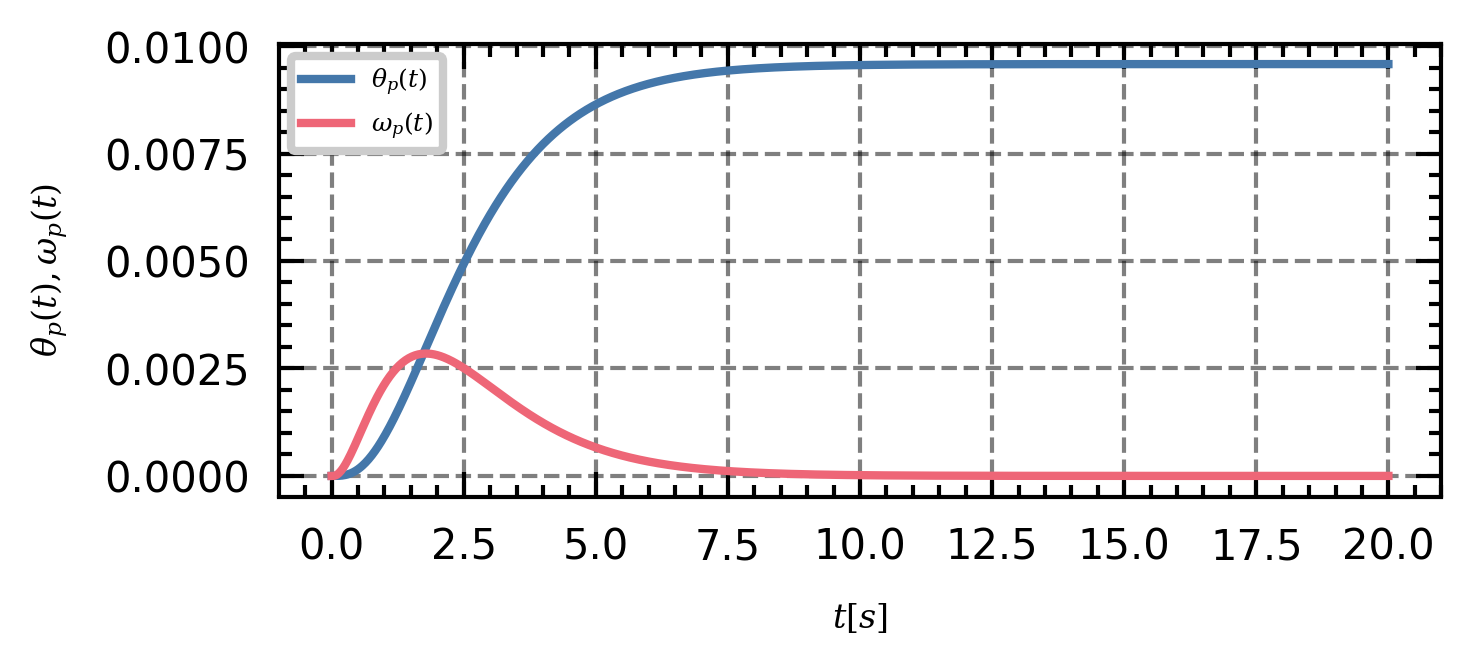

In [18]:
# Definindo a figura 4
fig4, ax4 = plt.subplots(1,1, figsize = (2.5,1))
#plotando a thetap
line1_thep = ax4.plot(t_n,ans.T[4],label = r'$\theta_p(t)$')
ax4.set_xlabel(r'$t[s]$',fontsize = 4)
ax4.set_ylabel(r'$\theta_p(t), \omega_p(t)$',fontsize = 4)
#plotando a omegap
line2_wp = ax4.plot(t_n,ans.T[5],label = r'$\omega_p(t)$')

plt.legend(fontsize = 3)

# Tentando colocar RNL

## Importando as bibliotecas

In [1]:
!pip install --upgrade jax  # install jax
!pip install jax[cpu]==0.2.27

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached jax-0.4.1-py3-none-any.whl
  Attempting uninstall: jax
    Found existing installation: jax 0.2.27
    Uninstalling jax-0.2.27:
      Successfully uninstalled jax-0.2.27
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached jax-0.2.27-py3-none-any.whl
  Attempting uninstall: jax
    Found existing installation: jax 0.4.1
    Uninstalling jax-0.4.1:
      Successfully uninstalled jax-0.4.1


In [21]:
!pip install -U -q Pillow moviepy proglog
!pip install SciencePlots

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
from jax.experimental.ode import odeint
from jax.experimental import optimizers
from jax.experimental import stax
from jax.lib import xla_bridge
import jax.numpy as jnp
import jax
from functools import partial # reduces arguments to function by making some subset implicit
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import scienceplots
#Definindo o estilo do gráfico
plt.style.use(['science','no-latex','grid','ieee','bright'])
plt.rcParams['xtick.labelsize'] = 5
plt.rcParams['ytick.labelsize'] = 5

#Verificando se a GPU está sendo usada
from jax.lib import xla_bridge
print(xla_bridge.get_backend().platform)

cpu




## Lagrangiano do sistema












In [4]:
def lagrangian(q, q_dot, Jh_ns,N1_ns,N2_ns,Jm_ns,Lind_ns,g_ns,d_ns,m_ns):
  Qf, pos_eixo, pos_pendulo = q
  corrente, w_eixo, w_pendulo = q_dot 

  T = Jm_ns/2 * w_eixo**2 +  Jh_ns/2 * ((N1_ns/N2_ns) * w_eixo)**2 + 1/2 * m_ns * (d_ns**2)*w_pendulo**2 + (Lind_ns/2)*corrente**2  #Energia cinética do sistema

  U = -m_ns * g_ns * d_ns * jnp.sin(pos_pendulo)  #Energia potêncial

  return T - U

In [5]:
def diss_rayleigh(q, q_dot,r_ns,F1_ns,F2_ns,N1_ns,N2_ns,Kq_ns,c_ns):
  Qf, pos_eixo,pos_pendulo = q
  corrente, w_eixo, w_pendulo = q_dot 

  dissipation_rayleigh = r_ns/2 * corrente**2 + F1_ns/2 * w_eixo**2 + F2_ns/2 * ((N1_ns/N2_ns)*w_eixo)**2+ Kq_ns/3 * ((N1_ns/N2_ns)*w_eixo)**3 + c_ns/2 * w_pendulo**2

  return dissipation_rayleigh

In [6]:
def external_forces(q,q_dot, Ki_ns, l_ns,Kt_ns,N1_ns,N2_ns,Kw_ns,va_ns):
  Qf, pos_eixo, pos_pendulo = q
  corrente, w_eixo, w_pendulo = q_dot 

  C_eixo1 = -Kw_ns*w_eixo + va_ns
  C_eixo2 = Ki_ns*corrente  
  C_eixo3 = Kt_ns*l_ns*((N1_ns/N2_ns)**2)*(w_eixo)**2

  return jnp.stack([C_eixo1,C_eixo2,C_eixo3])

In [7]:
def f_analytical(state, t_ns=0, Jh_ns=1,N1_ns=1,N2_ns=2,Jm_ns=4,L_ns=10e-3,g_ns=9.81,l_ns=0.5,d_ns=0.25,m_ns=0.5,va_ns = 1, r_ns = 1,Kw_ns = 0.1,Ki_ns = 0.1,Kq_ns=0.5,Kt_ns = 100,F1_ns =3,F2_ns=1,c_ns=1):
  Qf,corrente, pos_eixo,w_eixo, pos_pendulo, w_pendulo = state

  dqdt = corrente
  corrente_d = (1/L_ns) * va_ns - (r_ns/L_ns) *  corrente - (Kw_ns/L_ns)*w_eixo
  dtheta1dt = w_eixo
  weixo_d = Ki_ns/(Jm_ns + Jh_ns * (N1_ns/N2_ns)**2) * corrente - ((F1_ns + F2_ns * (N1_ns/N2_ns)**2)/(Jm_ns + Jh_ns * (N1_ns/N2_ns)**2)) * w_eixo - ((Kq_ns*(N1_ns/N2_ns)**3)/(Jm_ns + Jh_ns * (N1_ns/N2_ns)**2))* w_eixo**2
  dthetapdt = w_pendulo
  wpendulo_d = ((l_ns*Kt_ns/(m_ns*d_ns**2))*(N1_ns/N2_ns)**2) * w_eixo**2 - ((m_ns*g_ns*d_ns)/(m_ns*d_ns**2)) * jnp.sin(pos_pendulo) - (c_ns/(m_ns*d_ns**2)) * w_pendulo

  return jnp.stack([dqdt,corrente_d,dtheta1dt,weixo_d,dthetapdt, wpendulo_d])



## Dinâmica do sistema

In [29]:
def equation_of_motion(lagrangian, diss_rayleigh, external_forces, state, t=None):
  q, q_t = jnp.split(state, 2)
  A = jnp.linalg.pinv(jax.hessian(lagrangian, 1)(q, q_t)) 
  B = jax.grad(lagrangian, 0)(q, q_t)
  C = jax.jacobian(jax.jacobian(lagrangian, 1), 0)(q, q_t) @ q_t
  D = jax.grad(diss_rayleigh, 1)(q, q_t)
  E = external_forces(q, q_t)
  q_tt =   A @ ( B - C - D + E)

  return jnp.concatenate([q_t, q_tt])
 
def solve_lagrangian(lagrangian, diss_rayleigh, external_forces,initial_state, **kwargs):
  # We currently run odeint on CPUs only, because its cost is dominated by
  # control flow, which is slow on GPUs.
  @partial(jax.jit, backend='cpu')
  def f(initial_state):
    return odeint(partial(equation_of_motion, lagrangian, diss_rayleigh, external_forces),
                  initial_state, **kwargs)
  return f(initial_state)
@partial(jax.jit, backend='cpu')
def solve_analytical(initial_state, times):
  return odeint(f_analytical, initial_state, t=times, rtol=1e-10, atol=1e-10)

In [30]:
# Double pendulum dynamics via the rewritten Euler-Lagrange
@partial(jax.jit, backend='cpu')
def solve_autograd(initial_state, times, Jh_ns=1,N1_ns=1,N2_ns=2,Jm_ns=4,Lind_ns=10e-3,g_ns=9.81,l_ns=0.5,d_ns=0.25,m_ns=0.5,va_ns = 1, r_ns = 1,Kw_ns = 0.1,Ki_ns = 0.1,Kq_ns=0.5,Kt_ns = 100,F1_ns =3,F2_ns=1,c_ns=1):
  L = partial(lagrangian,Jh_ns=Jh_ns,N1_ns=N1_ns,N2_ns=N2_ns,Jm_ns=Jm_ns,Lind_ns=Lind_ns,g_ns=g_ns,d_ns=d_ns,m_ns=m_ns)
  DR = partial(diss_rayleigh,r_ns=r_ns,F1_ns=F1_ns,F2_ns=F2_ns,N1_ns=N1_ns,N2_ns=N2_ns,Kq_ns=Kq_ns,c_ns=c_ns)
  EF = partial(external_forces, Ki_ns=Ki_ns, l_ns=l_ns,Kt_ns=Kt_ns,N1_ns=N1_ns,N2_ns=N2_ns,Kw_ns=Kw_ns,va_ns=va_ns)
  return solve_lagrangian(L,DR,EF,initial_state, t=times, rtol=1e-10, atol=1e-10)
# Double pendulum dynamics via analytical forces taken from Diego's blog
@partial(jax.jit, backend='cpu')
def solve_analytical(initial_state, times):
  return odeint(f_analytical, initial_state, t=times, rtol=1e-10, atol=1e-10)

## Gerando a solução

In [31]:
# choose an initial state
x0 = np.array([0,0,0,0,0,0], dtype=np.float32)
t = np.linspace(0, 20, num=1000, dtype=np.float32)

In [32]:
# compute dynamics via autograd / the rewritten E-L equation
%time ans_l = jax.device_get(solve_autograd(x0, t))
# compute dynamics analytically
%time ans_a = jax.device_get(solve_analytical(x0, t))

CPU times: user 1.33 s, sys: 18.4 ms, total: 1.35 s
Wall time: 1.35 s
CPU times: user 536 ms, sys: 2.11 ms, total: 538 ms
Wall time: 540 ms


# Plotando os resultados

## Analiticamente

### Carga elétrica e corrente

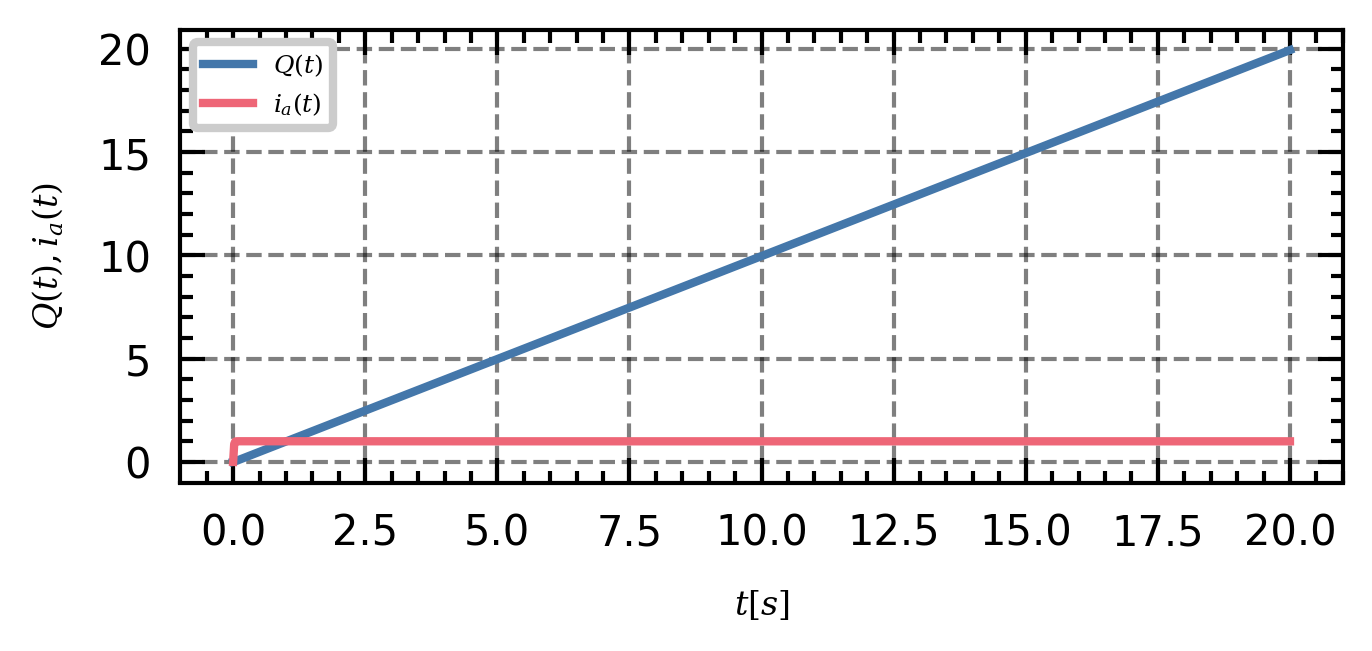

In [26]:
# Definindo a figura 1
fig1_2, ax1_2 = plt.subplots(1,1, figsize = (2.5,1))
#plotando a carga
line1_Q_2 = ax1_2.plot(t,ans_a[:,0],label = r'$Q(t)$')
ax1_2.set_xlabel(r'$t[s]$',fontsize = 4)
ax1_2.set_ylabel(r'$Q(t), i_a(t)$',fontsize = 4)
#plotando a corrente
line2_i_2 = ax1_2.plot(t,ans_a[:,1],label = r'$i_a(t)$')

plt.legend(fontsize = 3)

### $\theta_1, \omega_1$

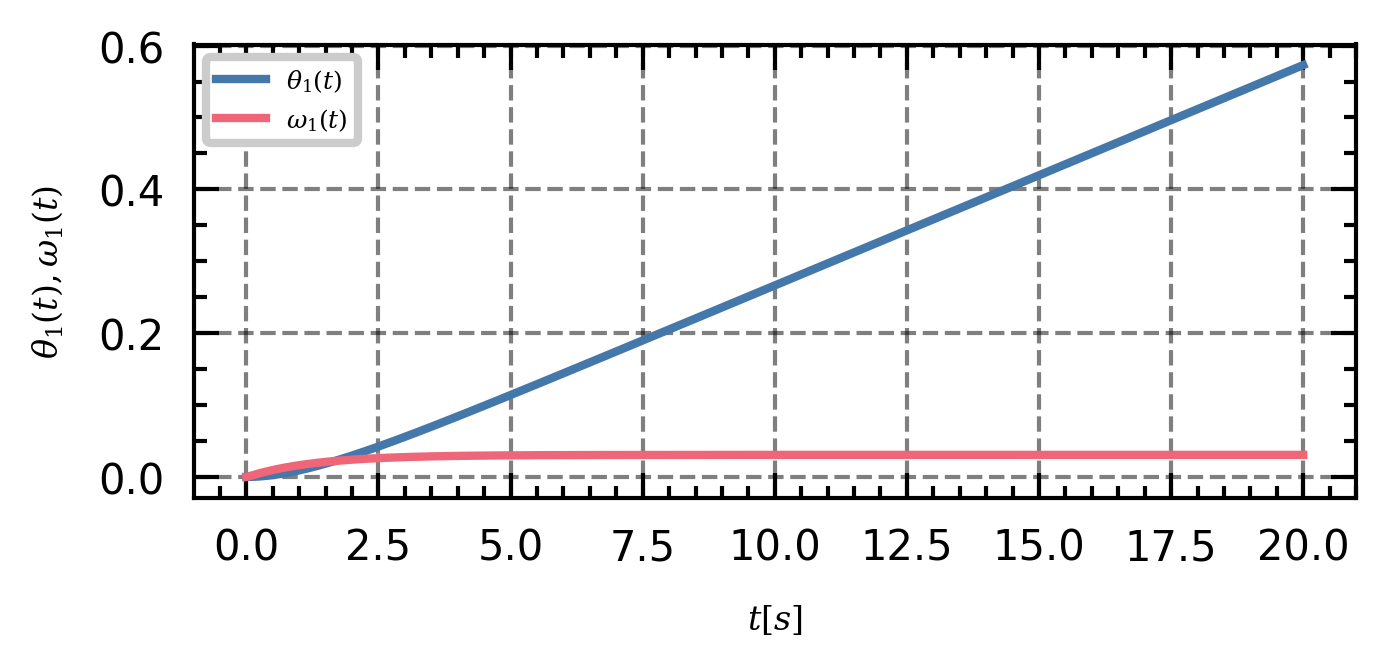

In [27]:
# Definindo a figura 2
fig2_2, ax2_2 = plt.subplots(1,1, figsize = (2.5,1))
#plotando theta
line1_the1_2 = ax2_2.plot(t,ans_a[:,2],label = r'$\theta_1(t)$')
ax2_2.set_xlabel(r'$t[s]$',fontsize = 4)
ax2_2.set_ylabel(r'$\theta_1(t), \omega_1(t)$',fontsize = 4)
#plotando w_1
line2_w1_2= ax2_2.plot(t,ans_a[:,3],label = r'$\omega_1(t)$')

plt.legend(fontsize = 3)


### $\theta_p,\omega_p$

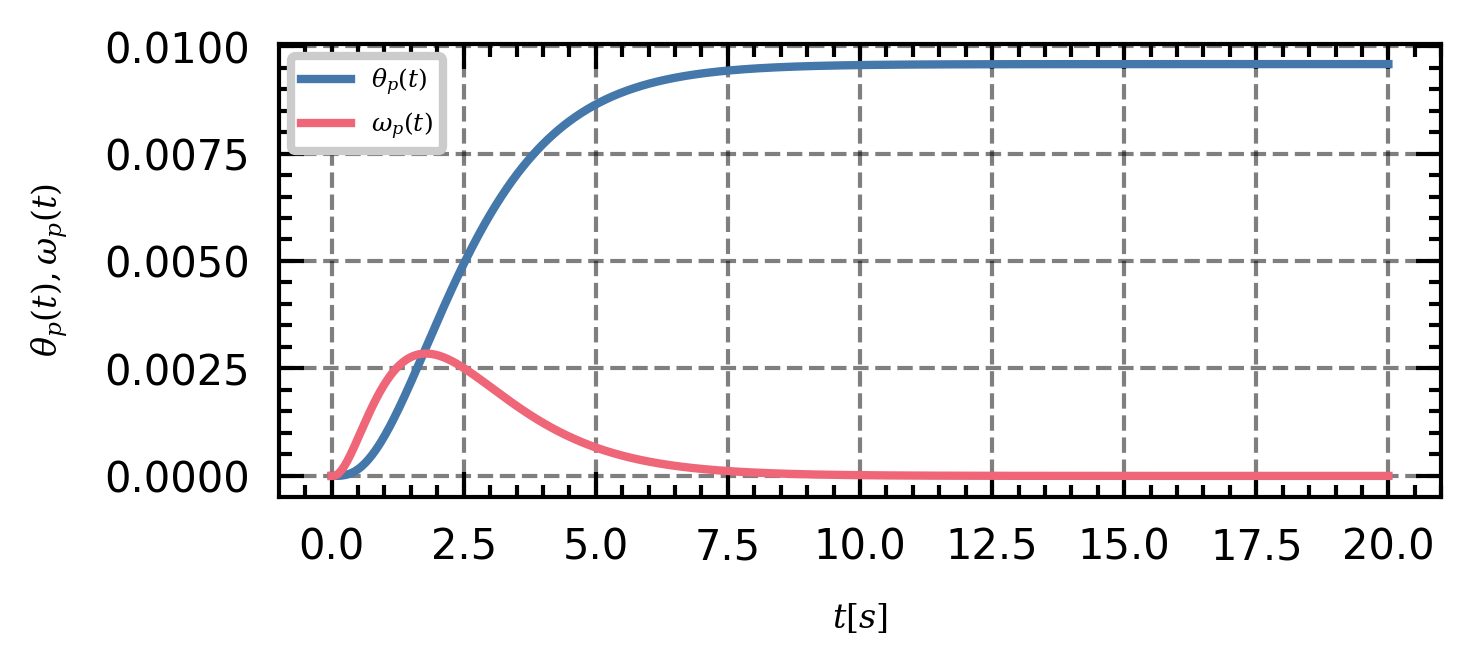

In [28]:
# Definindo a figura 4
fig3_2, ax3_2 = plt.subplots(1,1, figsize = (2.5,1))
#plotando a thetap
line1_thep_2 = ax3_2.plot(t,ans_a[:,4],label = r'$\theta_p(t)$')
ax3_2.set_xlabel(r'$t[s]$',fontsize = 4)
ax3_2.set_ylabel(r'$\theta_p(t), \omega_p(t)$',fontsize = 4)
#plotando a omegap
line2_wp_2 = ax3_2.plot(t,ans_a[:,5],label = r'$\omega_p(t)$')

plt.legend(fontsize = 3)

## Pelo Lagrangiano

### Carga elétrica e corrente

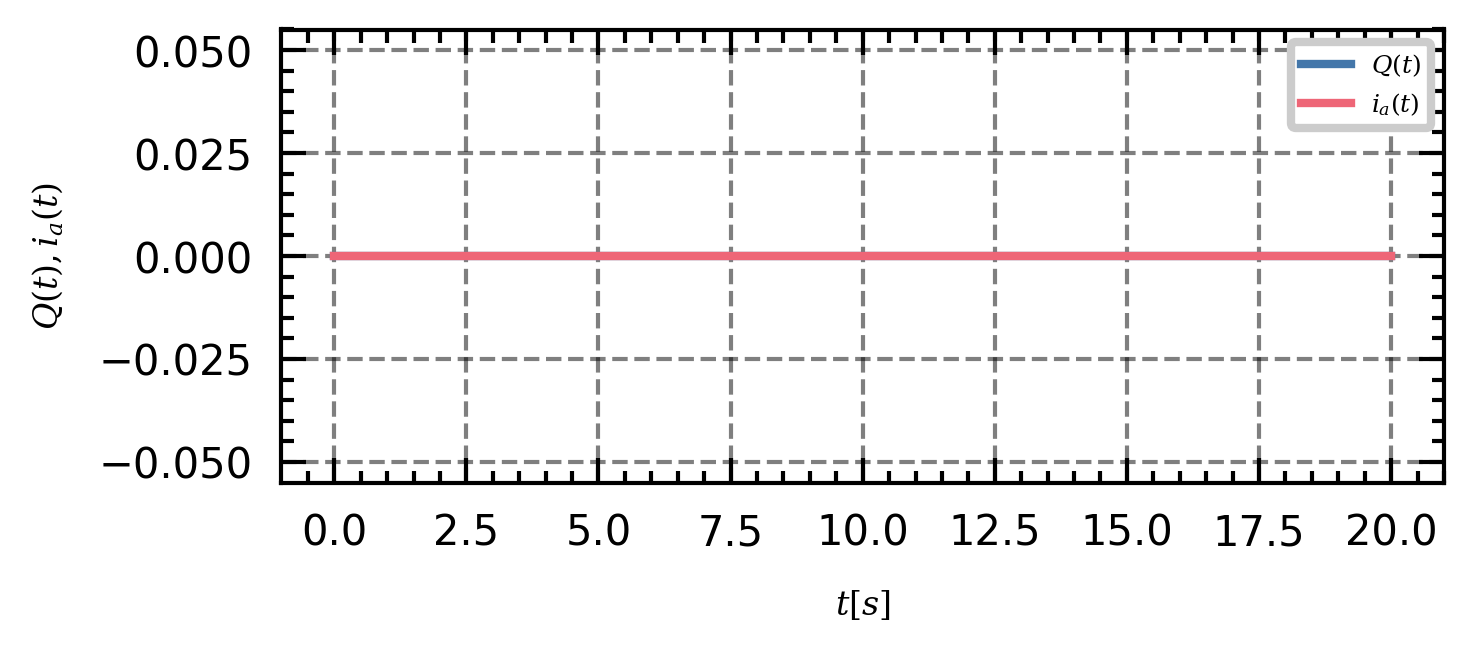

In [33]:
# Definindo a figura 4
fig4_3, ax4_3 = plt.subplots(1,1, figsize = (2.5,1))
#plotando a carga
line1_Q_3 = ax4_3.plot(t,ans_l[:,0],label = r'$Q(t)$')
ax4_3.set_xlabel(r'$t[s]$',fontsize = 4)
ax4_3.set_ylabel(r'$Q(t), i_a(t)$',fontsize = 4)
#plotando a corrente
line2_i_3 = ax4_3.plot(t,ans_l[:,3],label = r'$i_a(t)$')

plt.legend(fontsize = 3)

### $\theta_1,\omega_1$

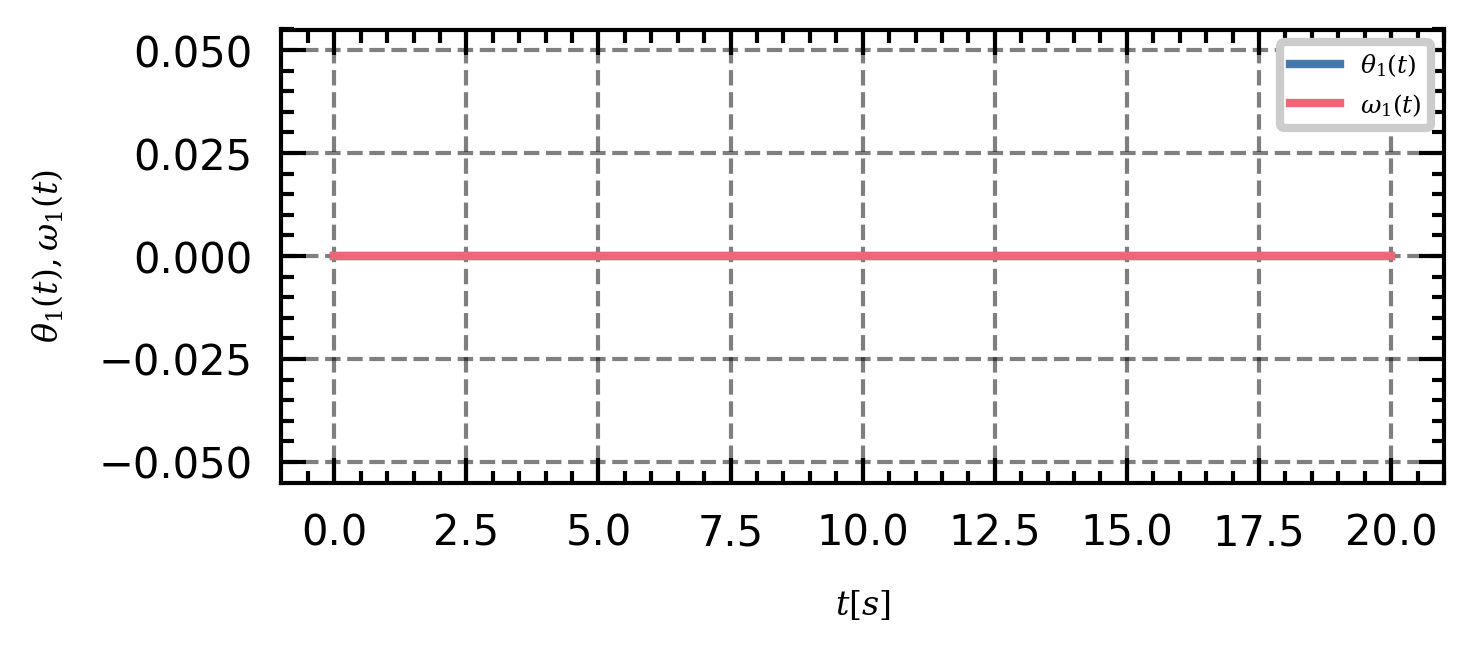

In [34]:
# Definindo a figura 5
fig5_3, ax5_3 = plt.subplots(1,1, figsize = (2.5,1))
#plotando theta
line1_the_3 = ax5_3.plot(t,ans_l[:,1],label = r'$\theta_1(t)$')
ax5_3.set_xlabel(r'$t[s]$',fontsize = 4)
ax5_3.set_ylabel(r'$\theta_1(t), \omega_1(t)$',fontsize = 4)
#plotando w_1
line2_w1_3= ax5_3.plot(t,ans_l[:,4],label = r'$\omega_1(t)$')

plt.legend(fontsize = 3)


###$\theta_p,\omega_p$

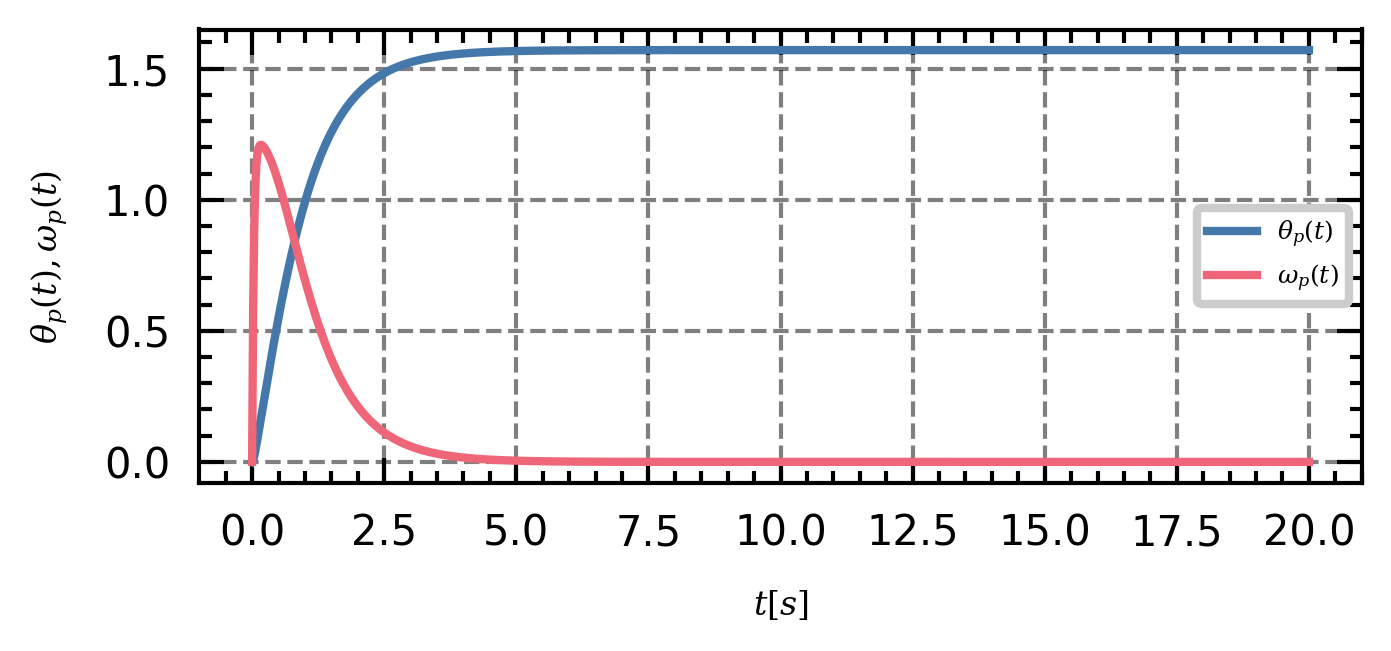

In [36]:
# Definindo a figura 6
fig6_3, ax6_3 = plt.subplots(1,1, figsize = (2.5,1))
#plotando a thetap
line1_thep_3 = ax6_3.plot(t,ans_l[:,2],label = r'$\theta_p(t)$')
ax6_3.set_xlabel(r'$t[s]$',fontsize = 4)
ax6_3.set_ylabel(r'$\theta_p(t), \omega_p(t)$',fontsize = 4)
#plotando a omegap
line2_wp_3 = ax6_3.plot(t,ans_l[:,5],label = r'$\omega_p(t)$')

plt.legend(fontsize = 3)

## Gerando o erro

In [36]:
erro_q =  ans_l[:,0] - ans_a[:,0]
erro_i =  ans_l[:,3] - ans_a[:,1]
erro_t1 = ans_l[:,1] - ans_a[:,2]
erro_w1 = ans_l[:,4] - ans_a[:,3]
erro_tp = ans_l[:,2] - ans_a[:,4]
erro_wp = ans_l[:,5] - ans_a[:,5]

### Calculando a autocorrelação

In [37]:
AC_q  = np.zeros(500)
AC_i  = np.zeros(500)
AC_t1 = np.zeros(500)
AC_w1 = np.zeros(500)
AC_tp = np.zeros(500)
AC_wp = np.zeros(500)
for k in range(1,500):
    sum_q = 0
    sum_i = 0
    sum_t1 = 0
    sum_w1 = 0
    sum_tp = 0
    sum_wp = 0
    for n in range(1,500):
        sum_q  = sum_q  + (erro_q[n]*erro_q[n+k])
        sum_i  = sum_i  + (erro_i[n]*erro_i[n+k])
        sum_t1 = sum_t1 + (erro_t1[n]*erro_t1[n+k])
        sum_w1 = sum_w1 + (erro_w1[n]*erro_w1[n+k])
        sum_tp = sum_tp + (erro_tp[n]*erro_tp[n+k])
        sum_wp  = sum_wp  + (erro_wp[n]*erro_wp[n+k])

    AC_q[k]  = AC_q[k]  + sum_q
    AC_i[k]  = AC_i[k]  + sum_i
    AC_t1[k] = AC_t1[k] + sum_t1
    AC_w1[k] = AC_w1[k] + sum_w1
    AC_tp[k] = AC_tp[k] + sum_tp
    AC_wp[k] = AC_wp[k] + sum_wp



In [38]:
R_q  = np.zeros(11)
R_i  = np.zeros(11)
R_t1 = np.zeros(11)
R_w1 = np.zeros(11)
R_tp = np.zeros(11)
R_wp = np.zeros(11)
for p in range(1,11):
    Rsum_q = 0
    Rsum_i = 0
    Rsum_t1 = 0
    Rsum_w1 = 0
    Rsum_tp = 0
    Rsum_wp = 0
    for m in range(1,11):
        Rsum_q  = Rsum_q  + (AC_q[m]**2)
        Rsum_i  = Rsum_i  + (AC_i[m]**2)
        Rsum_t1 = Rsum_t1 + (AC_t1[m]**2)
        Rsum_w1 = Rsum_w1 + (AC_w1[m]**2)
        Rsum_tp = Rsum_tp + (AC_tp[m]**2)
        Rsum_wp  = Rsum_wp  + (AC_wp[m]**2)

    R_q[p]  = R_q[p]  + Rsum_q
    R_i[p]  = R_i[p]  + Rsum_i
    R_t1[p] = R_t1[p] + Rsum_t1
    R_w1[p] = R_w1[p] + Rsum_w1
    R_tp[p] = R_tp[p] + Rsum_tp
    R_wp[p] = R_wp[p] + Rsum_wp
R_q_f = R_q[p] *(500/AC_q[1]**2)
R_i_f = R_i[p] *(500/AC_i[1]**2)
R_t1_f = R_t1[p] *(500/AC_t1[1]**2)
R_w1_f = R_w1[p] *(500/AC_w1[1]**2)
R_tp_f = R_tp[p] *(500/AC_tp[1]**2)
R_wp_f = R_wp[p] *(500/AC_wp[1]**2)


## Plotando erro e autocorrelação

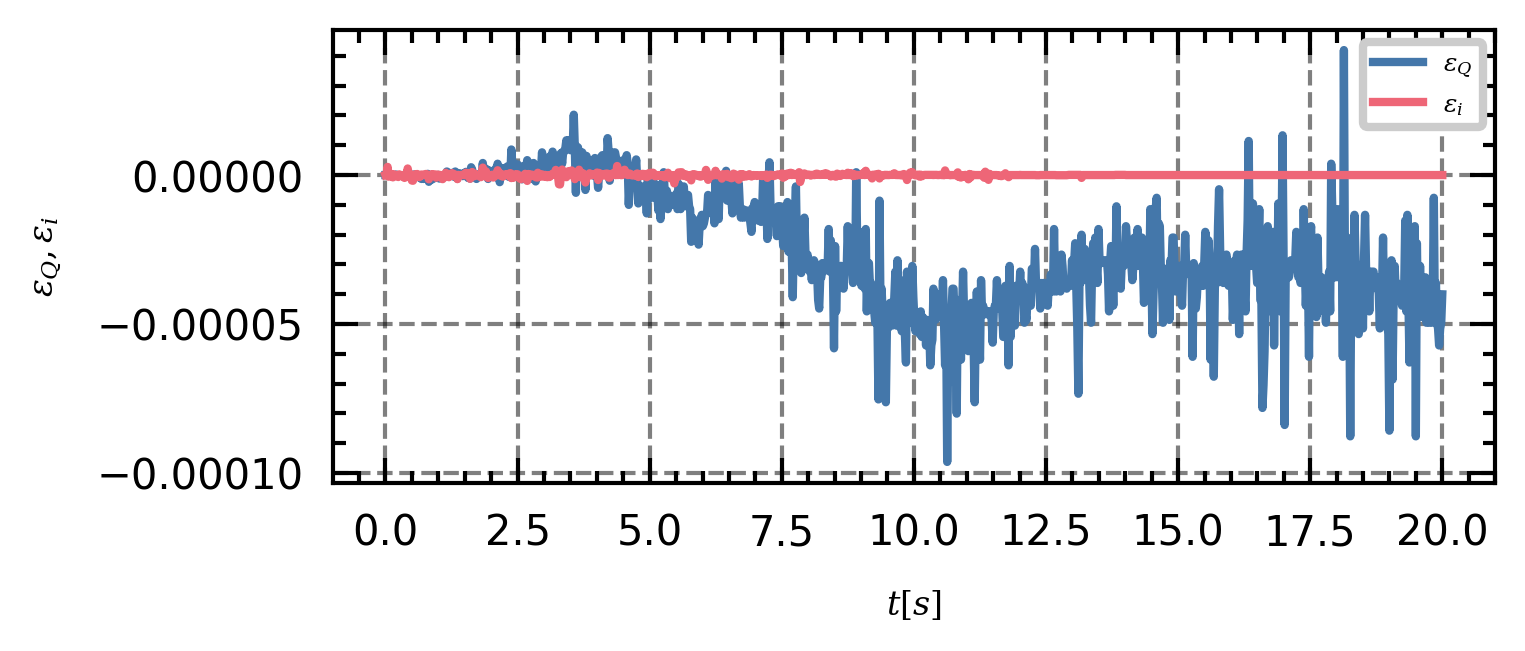

In [39]:
# Definindo a figura 4
fig7_4, ax7_4 = plt.subplots(1,1, figsize = (2.5,1))

#plotando para a carga
line1_Q_4 = ax7_4.plot(t,erro_q,label = r'$\varepsilon_Q$')

#plotando a corrente
line1_i_4 = ax7_4.plot(t,erro_i,label = r'$\varepsilon_i$')

ax7_4.set_xlabel(r'$t[s]$',fontsize = 4)
ax7_4.set_ylabel(r'Erro',fontsize = 4)
plt.legend(fontsize = 3)

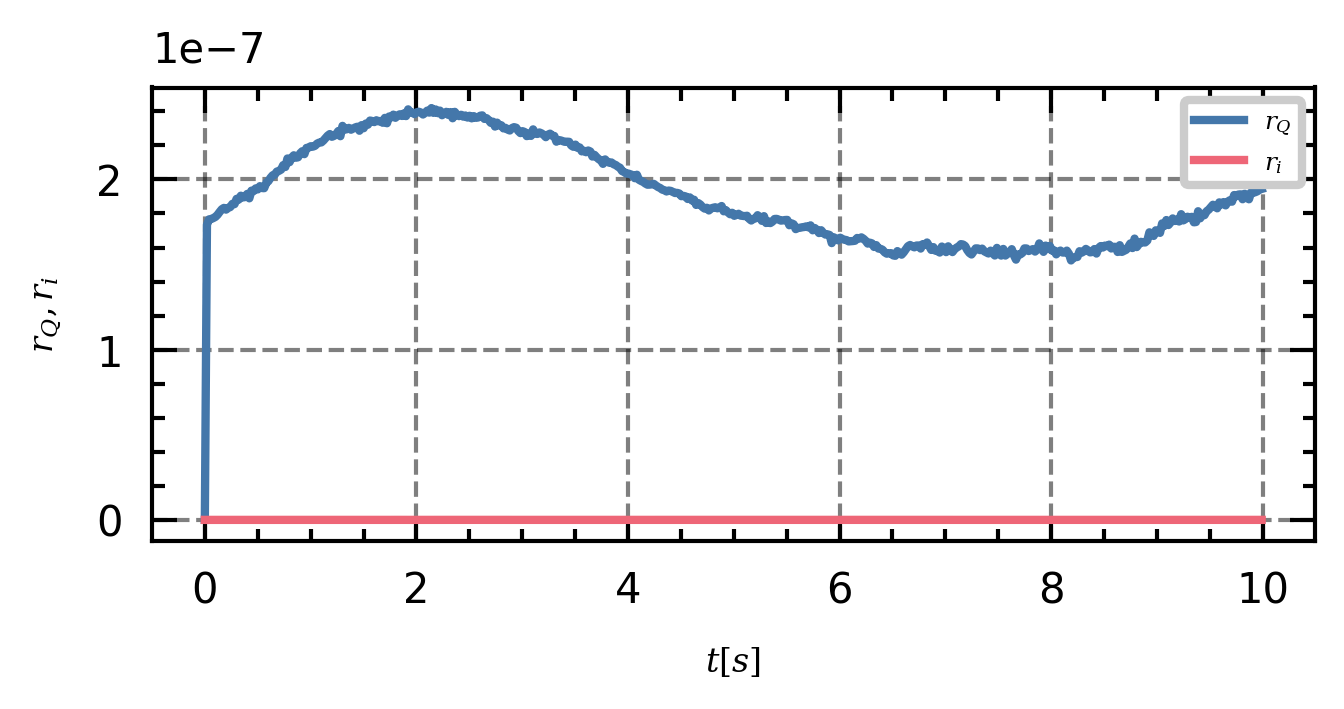

In [40]:
# Definindo a figura 8_4
fig8_4, ax8_4 = plt.subplots(1,1, figsize = (2.5,1))

#plotando para a carga
line2_Q_4 = ax8_4.plot(t[0:500],AC_q,label = r'$r_Q$')
#plotando a corrente
line2_i_4 = ax8_4.plot(t[0:500],AC_i,label = r'$r_i$')

ax8_4.set_xlabel(r'$t[s]$',fontsize = 4)
ax8_4.set_ylabel(r'$Correlação$',fontsize = 4)
plt.legend(fontsize = 3)

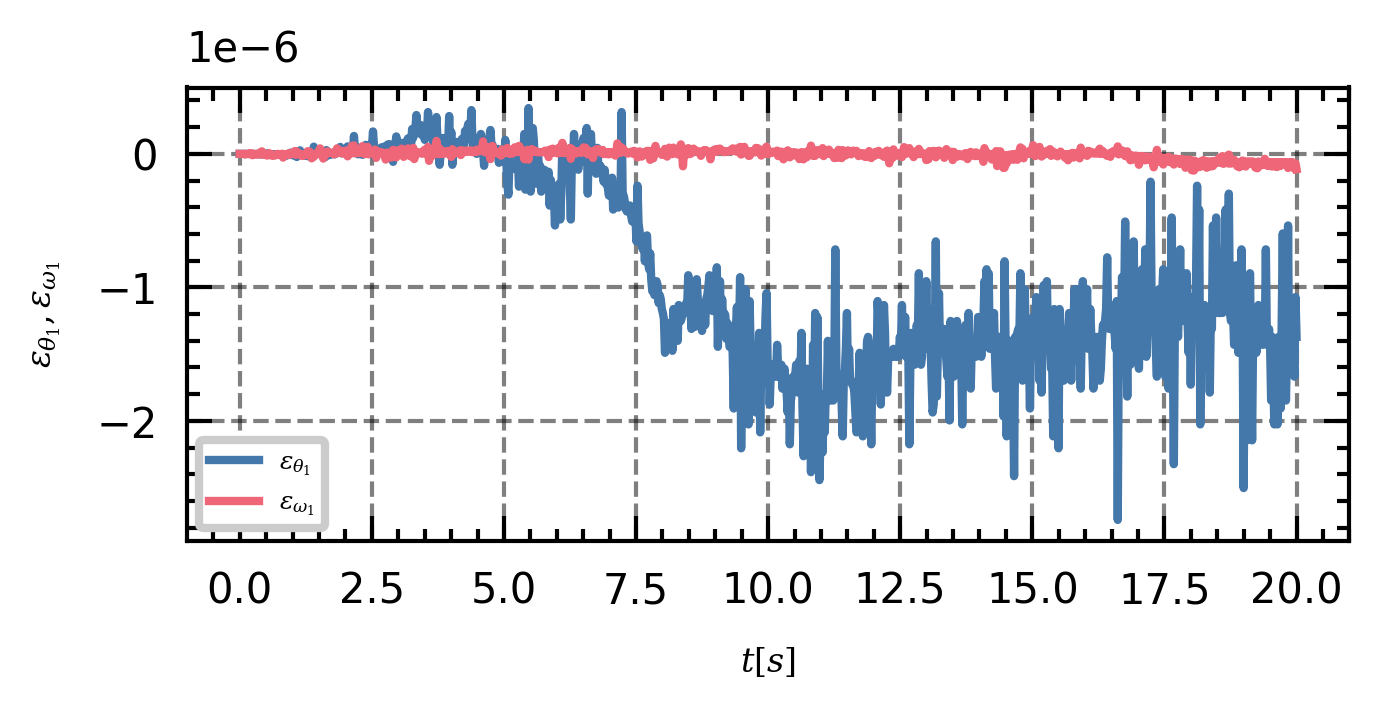

In [43]:
# Definindo a figura 9_4
fig9_4, ax9_4 = plt.subplots(1,1, figsize = (2.5,1))
#plotando theta
line1_the_4 = ax9_4.plot(t,erro_t1,label = r'$\varepsilon_{\theta_1}$')
ax9_4.set_xlabel(r'$t[s]$',fontsize = 4)
ax9_4.set_ylabel(r'$Erro$',fontsize = 4)
#plotando w_1
line2_w1_4= ax9_4.plot(t,erro_w1,label = r'$\varepsilon_{\omega_1}$')

plt.legend(fontsize = 3)

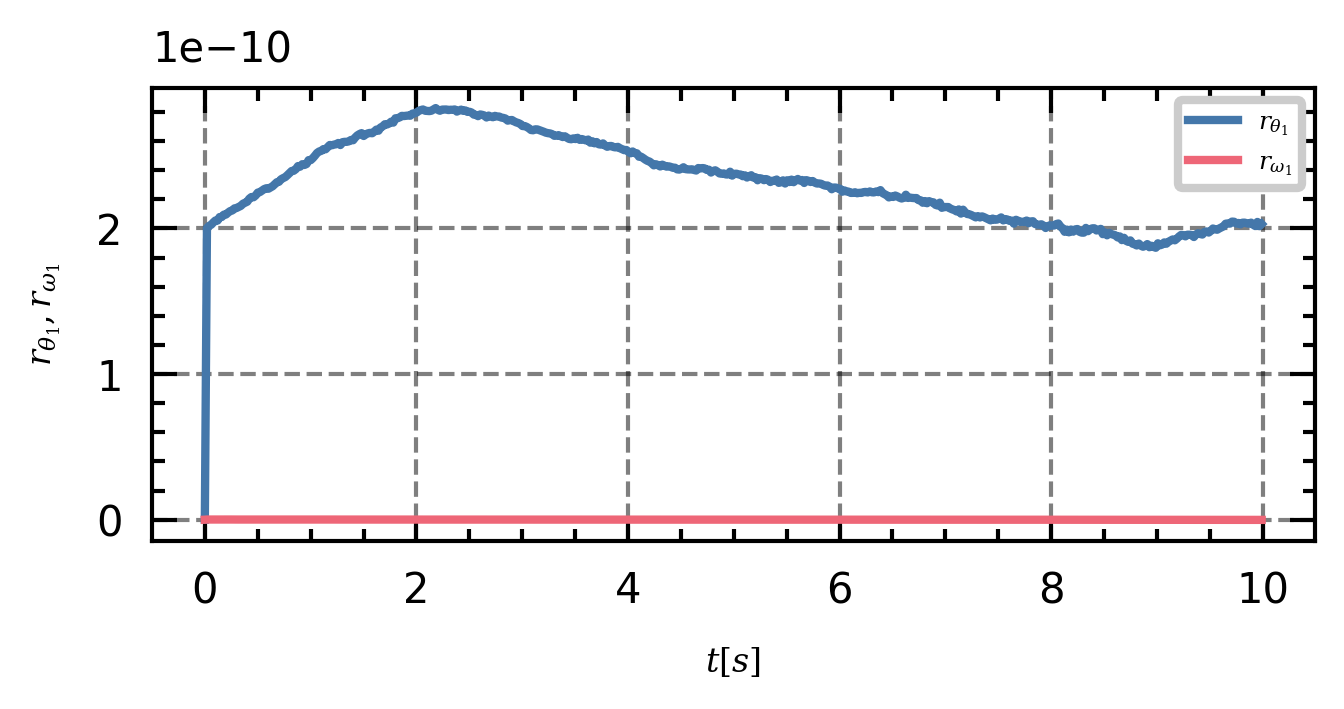

In [44]:
# Definindo a figura 10_4
fig10_4, ax10_4 = plt.subplots(1,1, figsize = (2.5,1))

#plotando para a carga
line2_the_4 = ax10_4.plot(t[0:500],AC_t1,label = r'$r_{\theta_1}$')
#plotando a corrente
line2_w1_4 = ax10_4.plot(t[0:500],AC_w1,label = r'$r_{\omega_1}$')

ax10_4.set_xlabel(r'$t[s]$',fontsize = 4)
ax10_4.set_ylabel(r'$Correlação$',fontsize = 4)
plt.legend(fontsize = 3)

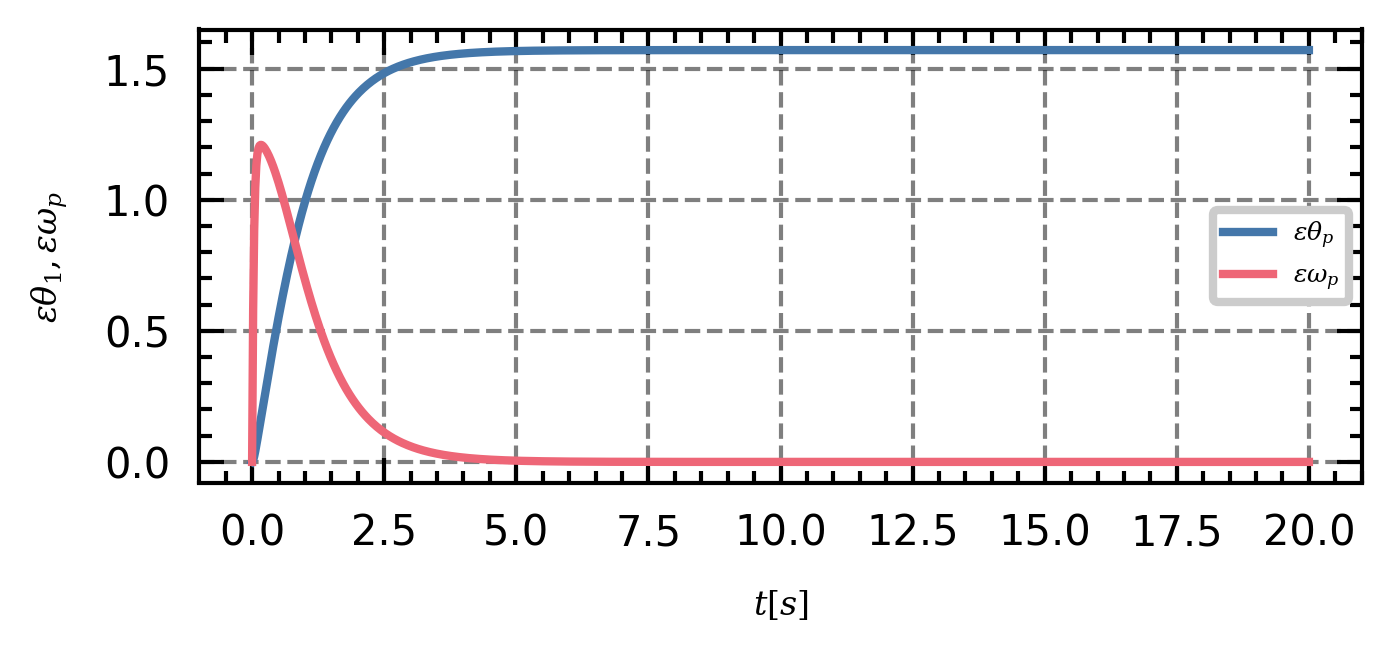

In [45]:
# Definindo a figura 11_4
fig11_4, ax11_4 = plt.subplots(1,1, figsize = (2.5,1))
#plotando a thetap
line1_thep_4 = ax11_4.plot(t,erro_tp,label = r'$\varepsilon{\theta_p}$')
ax11_4.set_xlabel(r'$t[s]$',fontsize = 4)
ax11_4.set_ylabel(r'$Erro$',fontsize = 4)
#plotando a omegap
line2_wp_4 = ax11_4.plot(t,erro_wp,label = r'$\varepsilon{\omega_p}$')

plt.legend(fontsize = 3)

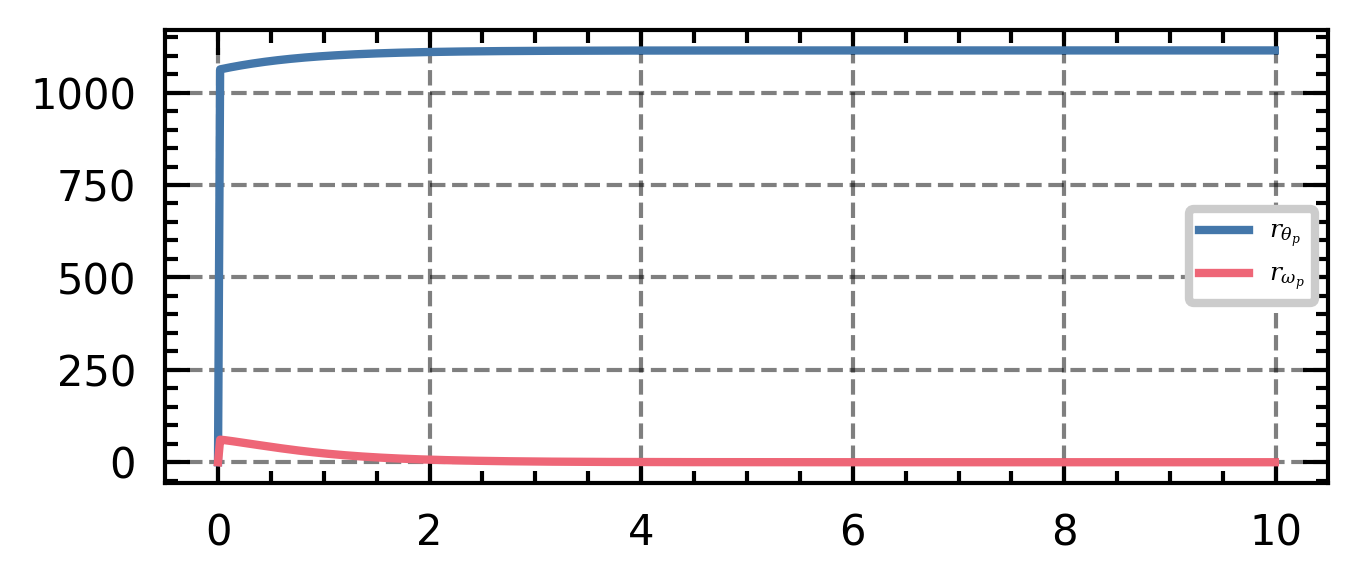

In [46]:
# Definindo a figura 12_4
fig12_4, ax12_4 = plt.subplots(1,1, figsize = (2.5,1))

#plotando para a carga
line2_thep_4    = ax12_4.plot(t[0:500],AC_tp,label = r'$r_{\theta_p}$')
#plotando a corrente
line2_wp_4      = ax12_4.plot(t[0:500],AC_wp,label = r'$r_{\omega_p}$')

ax10_4.set_xlabel(r'$t[s]$',fontsize = 4)
ax10_4.set_ylabel(r'$Correlação$',fontsize = 4)
plt.legend(fontsize = 3)

# Gerando dados de treino



In [ ]:
def rk4_step(f, x, t, h):
  # one step of runge-kutta integration
  k1 = h * f(x, t)
  k2 = h * f(x + k1/2, t + h/2)
  k3 = h * f(x + k2/2, t + h/2)
  k4 = h * f(x + k3, t + h)
  return x + 1/6 * (k1 + 2 * k2 + 2 * k3 + k4)

time_step = 0.01
N = 1500
analytical_step = jax.jit(jax.vmap(partial(rk4_step, f_analytical, t=0.0, h=time_step)))

x0 = np.array([0, 0, 0, 0,0,0], dtype=np.float32)
t = np.arange(N, dtype=np.float32) # time steps 0 to N
%time x_train = jax.device_get(solve_analytical(x0, t)) # dynamics for first N time steps
%time xt_train = jax.device_get(jax.vmap(f_analytical)(x_train)) # time derivatives of each state
%time y_train = jax.device_get(analytical_step(x_train)) # analytical next step

noise = np.random.RandomState(0).randn(x0.size)
t_test = np.arange(N, 2*N, dtype=np.float32) # time steps N to 2N
%time x_test = jax.device_get(solve_analytical(x0, t_test)) # dynamics for next N time steps
%time xt_test = jax.device_get(jax.vmap(f_analytical)(x_test)) # time derivatives of each state
%time y_test = jax.device_get(analytical_step(x_test)) # analytical next step


CPU times: user 659 ms, sys: 4.08 ms, total: 663 ms
Wall time: 662 ms
CPU times: user 172 ms, sys: 2 ms, total: 174 ms
Wall time: 175 ms
CPU times: user 163 ms, sys: 1.06 ms, total: 164 ms
Wall time: 164 ms
CPU times: user 39.9 ms, sys: 2 µs, total: 39.9 ms
Wall time: 39 ms
CPU times: user 9.99 ms, sys: 1e+03 ns, total: 9.99 ms
Wall time: 9.99 ms
CPU times: user 1.04 ms, sys: 2 µs, total: 1.04 ms
Wall time: 832 µs


Visualizando os dados de treino e de teste

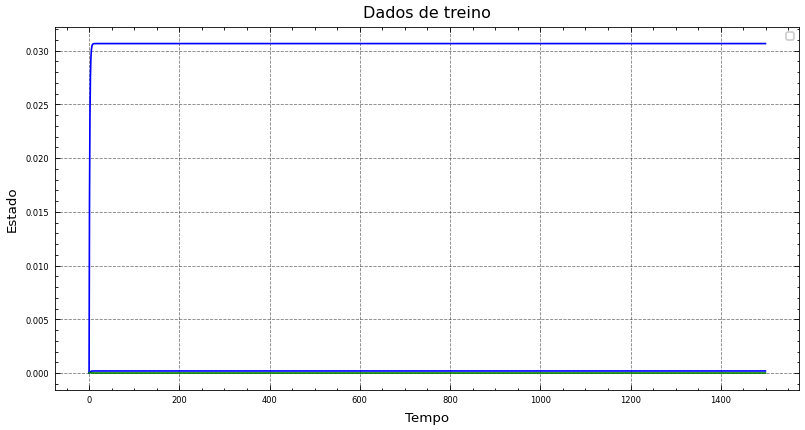

In [ ]:
def normalize_dp(state):
  # wrap generalized coordinates to [-pi, pi]
  return jnp.concatenate([(state[:5] + np.pi) % (2 * np.pi) - np.pi, state[5:]])

# preprocess
train_vis = jax.vmap(normalize_dp)(x_train)
test_vis = jax.vmap(normalize_dp)(x_test)

# plot train data
SCALE = 80 ; WIDTH = 0.006
plt.figure(figsize=[8,4], dpi=120)
plt.plot(t, train_vis[:, 3], 'b-', label='')
plt.plot(t, train_vis[:, 4], 'b-', label='')
plt.plot(t, train_vis[:, 5], 'g-', label='')
plt.title("Dados de treino") ; plt.xlabel('Tempo') ; plt.ylabel('Estado')
plt.legend(fontsize=6)
     

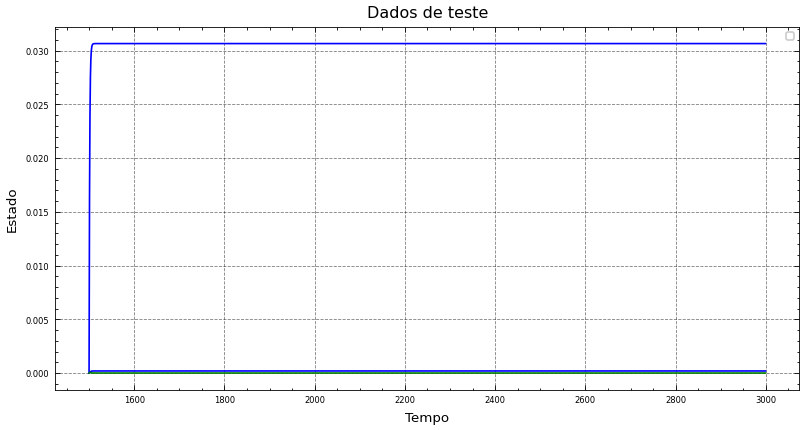

In [ ]:
# plot test data
SCALE = 80 ; WIDTH = 0.006
plt.figure(figsize=[8,4], dpi=120)
plt.plot(t_test, test_vis[:, 3], 'b-', label='')
plt.plot(t_test, test_vis[:, 4], 'b-', label='')
plt.plot(t_test, test_vis[:, 5], 'g-', label='')
plt.title("Dados de teste") ; plt.xlabel('Tempo') ; plt.ylabel('Estado')
plt.legend(fontsize=6)

# Criando a Rede Neural Lagrangiana




## Criando o modelo e definindo a função de perda

In [ ]:
# replace the lagrangian with a parameteric model
def learned_lagrangian(params):
  def lagrangian(q, q_t):
    assert q.shape == (3,)
    state = normalize_dp(jnp.concatenate([q, q_t]))
    return jnp.squeeze(nn_forward_fn(params, state), axis=-1)
  return lagrangian

def learned_diss_rayleigh(params):
  def diss_rayleigh(q, q_t):
    assert q.shape == (3,)
    state = normalize_dp(jnp.concatenate([q, q_t]))
    return jnp.squeeze(nn_forward_fn(params, state), axis=-1)
  return diss_rayleigh

def learned_external_forces(params):
  def external_forces(q, q_t):
    assert q.shape == (3,)
    state = normalize_dp(jnp.concatenate([q, q_t]))
    return jnp.squeeze(nn_forward_fn(params, state), axis=-1)
  return external_forces

# define the loss of the model (MSE between predicted q, \dot q and targets)
@jax.jit
def loss(params, batch, time_step=None):
  state, targets = batch
  if time_step is not None:
    f = partial(equation_of_motion, learned_lagrangian(params),learned_diss_rayleigh(params),learned_external_forces(params))
    preds = jax.vmap(partial(rk4_step, f, t=0.0, h=time_step))(state)
  else:
    preds = jax.vmap(partial(equation_of_motion, learned_lagrangian(params),learned_diss_rayleigh(params),learned_external_forces(params)))(state)
  return jnp.mean((preds - targets) ** 2)

# build a neural network model
init_random_params, nn_forward_fn = stax.serial(
    stax.Dense(128),
    stax.Softplus,
    stax.Dense(128),
    stax.Softplus,
    stax.Dense(1),
)

## Definindo a otimização e os dados

In [ ]:
@jax.jit
def update_timestep(i, opt_state, batch):
  params = get_params(opt_state)
  return opt_update(i, jax.grad(loss)(params, batch, time_step), opt_state)

@jax.jit
def update_derivative(i, opt_state, batch):
  params = get_params(opt_state)
  return opt_update(i, jax.grad(loss)(params, batch, None), opt_state)

x_train = jax.device_put(jax.vmap(normalize_dp)(x_train))
x_test = jax.device_put(jax.vmap(normalize_dp)(x_test))
     

## Treinando o modelo

In [ ]:
%%time

rng = jax.random.PRNGKey(0)
_, init_params = init_random_params(rng, (-1, 6))

# numbers in comments denote stephan's settings
batch_size = 1
test_every = 10
num_batches = 1500

train_losses = []
test_losses = []

# adam w learn rate decay
opt_init, opt_update, get_params = optimizers.adam(
    lambda t: jnp.select([t < batch_size*(num_batches//3),
                          t < batch_size*(2*num_batches//3),
                          t > batch_size*(2*num_batches//3)],
                         [1e-3, 3e-4, 1e-4]))
opt_state = opt_init(init_params)

for iteration in range(batch_size*100*num_batches + 1):
  if iteration % batch_size == 0:
    params = get_params(opt_state)
    train_loss = loss(params, (x_train, xt_train))
    train_losses.append(train_loss)
    test_loss = loss(params, (x_test, xt_test))
    test_losses.append(test_loss)
    if iteration % (batch_size*100*test_every) == 0:
      print(f"iteration={iteration}, train_loss={train_loss:.6f}, test_loss={test_loss:.6f}")
  opt_state = update_derivative(iteration, opt_state, (x_train, xt_train))

params = get_params(opt_state)

iteration=0, train_loss=175962272.000000, test_loss=698896512.000000
iteration=1000, train_loss=9424.840820, test_loss=9423.202148
iteration=2000, train_loss=9424.471680, test_loss=9422.836914
iteration=3000, train_loss=9423.784180, test_loss=9422.154297
iteration=4000, train_loss=9422.613281, test_loss=9420.977539
iteration=5000, train_loss=9420.654297, test_loss=9419.004883
iteration=6000, train_loss=9417.333008, test_loss=9415.700195
iteration=7000, train_loss=9411.740234, test_loss=9410.109375
iteration=8000, train_loss=9402.251953, test_loss=9400.626953
iteration=9000, train_loss=9386.138672, test_loss=9384.521484
iteration=10000, train_loss=9358.625000, test_loss=9356.993164
iteration=11000, train_loss=9312.270508, test_loss=9310.646484


KeyboardInterrupt: ignored

In [ ]:
3%(1)

0

## Plot das perdas pelo tempo

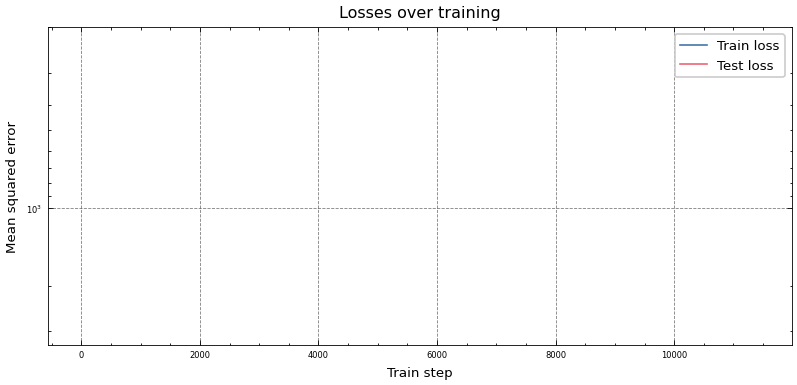

In [ ]:
plt.figure(figsize=(8, 3.5), dpi=120)
plt.plot(train_losses, label='Train loss')
plt.plot(test_losses, label='Test loss')
plt.yscale('log')
plt.ylim(None, 200)
plt.title('Losses over training')
plt.xlabel("Train step") ; plt.ylabel("Mean squared error")
plt.legend() ; plt.show()

# Fazendo previsões com o modelo


In [ ]:
# choose an initial state
x1 = np.array([0,0,0,0,0,0], dtype=np.float32)

t2 = np.linspace(0, 20, num=2)
%time x1_analytical = jax.device_get(solve_analytical(x1, t2))
%time x1_model = solve_lagrangian(learned_lagrangian(params), learned_diss_rayleigh(params),learned_external_forces(params),x1, t=t2)

CPU times: user 493 ms, sys: 1.75 ms, total: 495 ms
Wall time: 494 ms


In [ ]:
plt.subplot(2,1,2)
plt.title("Analytic vs LNN")
plt.xlabel("Time") ; plt.ylabel("State")
plt.plot(t2, x1_analytical[:, 2], 'g-', label=r'$\theta_1$ exact')
plt.plot(t2, x1_analytical[:, 3], 'c-', label=r'$\theta_2$ exact')
plt.plot(t2, x1_model[:, 2], 'g--', label=r'$\theta_1$ LNN')
plt.plot(t2, x1_model[:, 3], 'c--', label=r'$\theta_2$ LNN')
plt.legend(fontsize=6)

plt.tight_layout() ; plt.show()

In [ ]:
difference_of_states = x1_analytical - x1_model

plt.figure(figsize=[10,4], dpi=120)
# plt.title("Diferença entre o deslocamento calculado pela 2ª lei de Newton e o previsto pela RNL")
plt.xlabel("Tempo") ; plt.ylabel("Deslocamento")
plt.plot(t2, difference_of_states[:, 0], 'g-', label=r'deslocamento') ; plt.xlim(-0.1, 5)

plt.figure(figsize=[10,4], dpi=120)
# plt.title("Diferença entre a velocidade calculada pela 2ª lei de Newton e a prevista pela RNL")
plt.xlabel("Tempo") ; plt.ylabel("Velocidade")
plt.plot(t2, difference_of_states[:, 1], 'c-', label=r'velocidade') ; plt.xlim(-0.1, 5)